# Normal Distribution and QQ plot

In [8]:
from pathlib import Path
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.utils import resample

import seaborn as sns
import matplotlib.pylab as plt

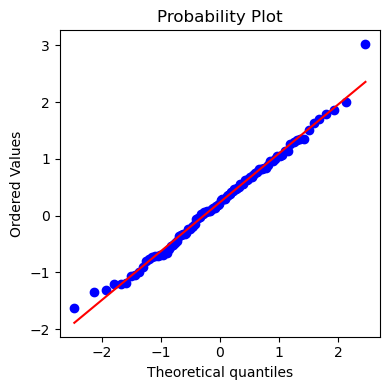

In [28]:
# Create a figure and axis
# Subplot: Create a figure and a set of subplots.
# This utility wrapper makes it convenient to create common layouts of subplots, 
# including the enclosing figure object, in a single call.

fig, ax = plt.subplots(figsize=(4, 4))


# This generates 100 random numbers from a normal (Gaussian) distribution
# stats.norm.rvs() comes from scipy.stats and creates random variates

# scipy.stats.norm: A normal continuous random variable.

norm_sample = stats.norm.rvs(size=100)


# Generate the Q-Q plot
# This creates a probability plot (also called a Q-Q plot) of the data
# A probability plot helps you visualize if your data follows a normal distribution
# If the points follow roughly along a straight line, the data is approximately normal
# The plot=ax parameter tells it to draw on our previously created axis
# probplot: Calculate quantiles for a probability plot, and optionally show the plot.
# probplot(x, sparams=(), dist='norm', fit=True, plot=None, rvalue=False)

#A QQ-Plot is used to visually determine how close a sample is to a specified distribution

stats.probplot(norm_sample, plot=ax)


# Adjust layout and display the plot
plt.tight_layout()
plt.show()



## Explainer for stats.norm.rvs(size=100) 

Break down of stats.norm.rvs(size=100) in more detail:

- stats.norm represents the normal (or Gaussian) distribution in scipy.stats. This is the classic "bell curve" distribution that shows up frequently in statistics.

- .rvs() stands for "random variates" - it generates random numbers that follow this normal distribution.

- size=100 specifies that we want 100 random numbers.

By default, this generates numbers from a "standard normal distribution" which means:
The mean (center of the bell curve) is 0
The standard deviation (spread of the bell curve) is 1

size=100 gives you 100 individual numbers (just x values), not points with x and y coordinates.

Each number represents a single random draw from the normal distribution. So you get 100 individual numbers, not 100 pairs of coordinates.
When these numbers are used in stats.probplot(), that function then creates the x-y coordinates for plotting by:

- Sorting these 100 numbers
- Comparing them against theoretical quantiles from a normal distribution
- Creating pairs of points (x,y) for plotting

But the original rvs() function just gives you a 1-dimensional array of 100 random numbers.


## More on "comparing them against theoretical quantiles from a normal distribution"

How the comparison with theoretical quantiles works, as it's a bit more sophisticated than just finding the closest normal distribution value.
Think of it this way: Let's say you have your 100 random numbers. Instead of just comparing each number directly to a normal distribution, the process goes like this:


1) The numbers are sorted from smallest to largest.
2) For each position in this sorted list (1st, 2nd, 3rd, etc.), we ask: "In a perfect normal distribution, what value would we expect to see at this position?" These are the theoretical quantiles.
3) For example, in a perfect normal distribution:
The middle number (50th percentile) should be around 0
About 68% of numbers should fall between -1 and 1
About 95% of numbers should fall between -2 and 2

So rather than just finding the closest normal distribution value, it's more about comparing the *pattern* or structure of your data to what we'd expect in a perfect normal distribution.

This is why when you see a Q-Q plot (the result of probplot), you're looking for points to fall along a straight line. If they do, it means your actual data's pattern matches what we'd expect from a normal distribution, even if the individual numbers aren't exactly what you'd predict.

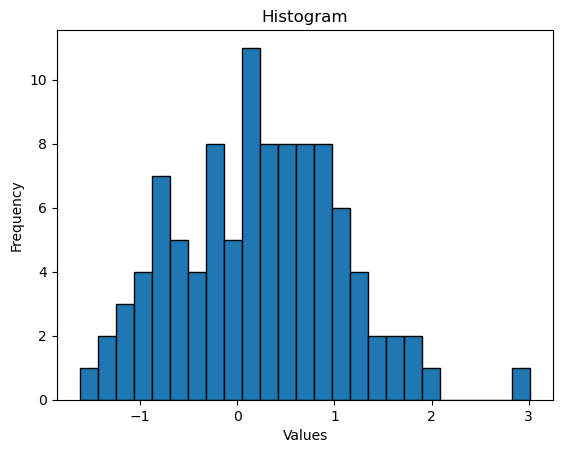

In [65]:
# Let's take a look at the histogram for the data:
plt.hist(norm_sample, bins=25, edgecolor='black')

# Add labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram')

# Display the plot
plt.show()